In [1]:
from IPython.display import Image 

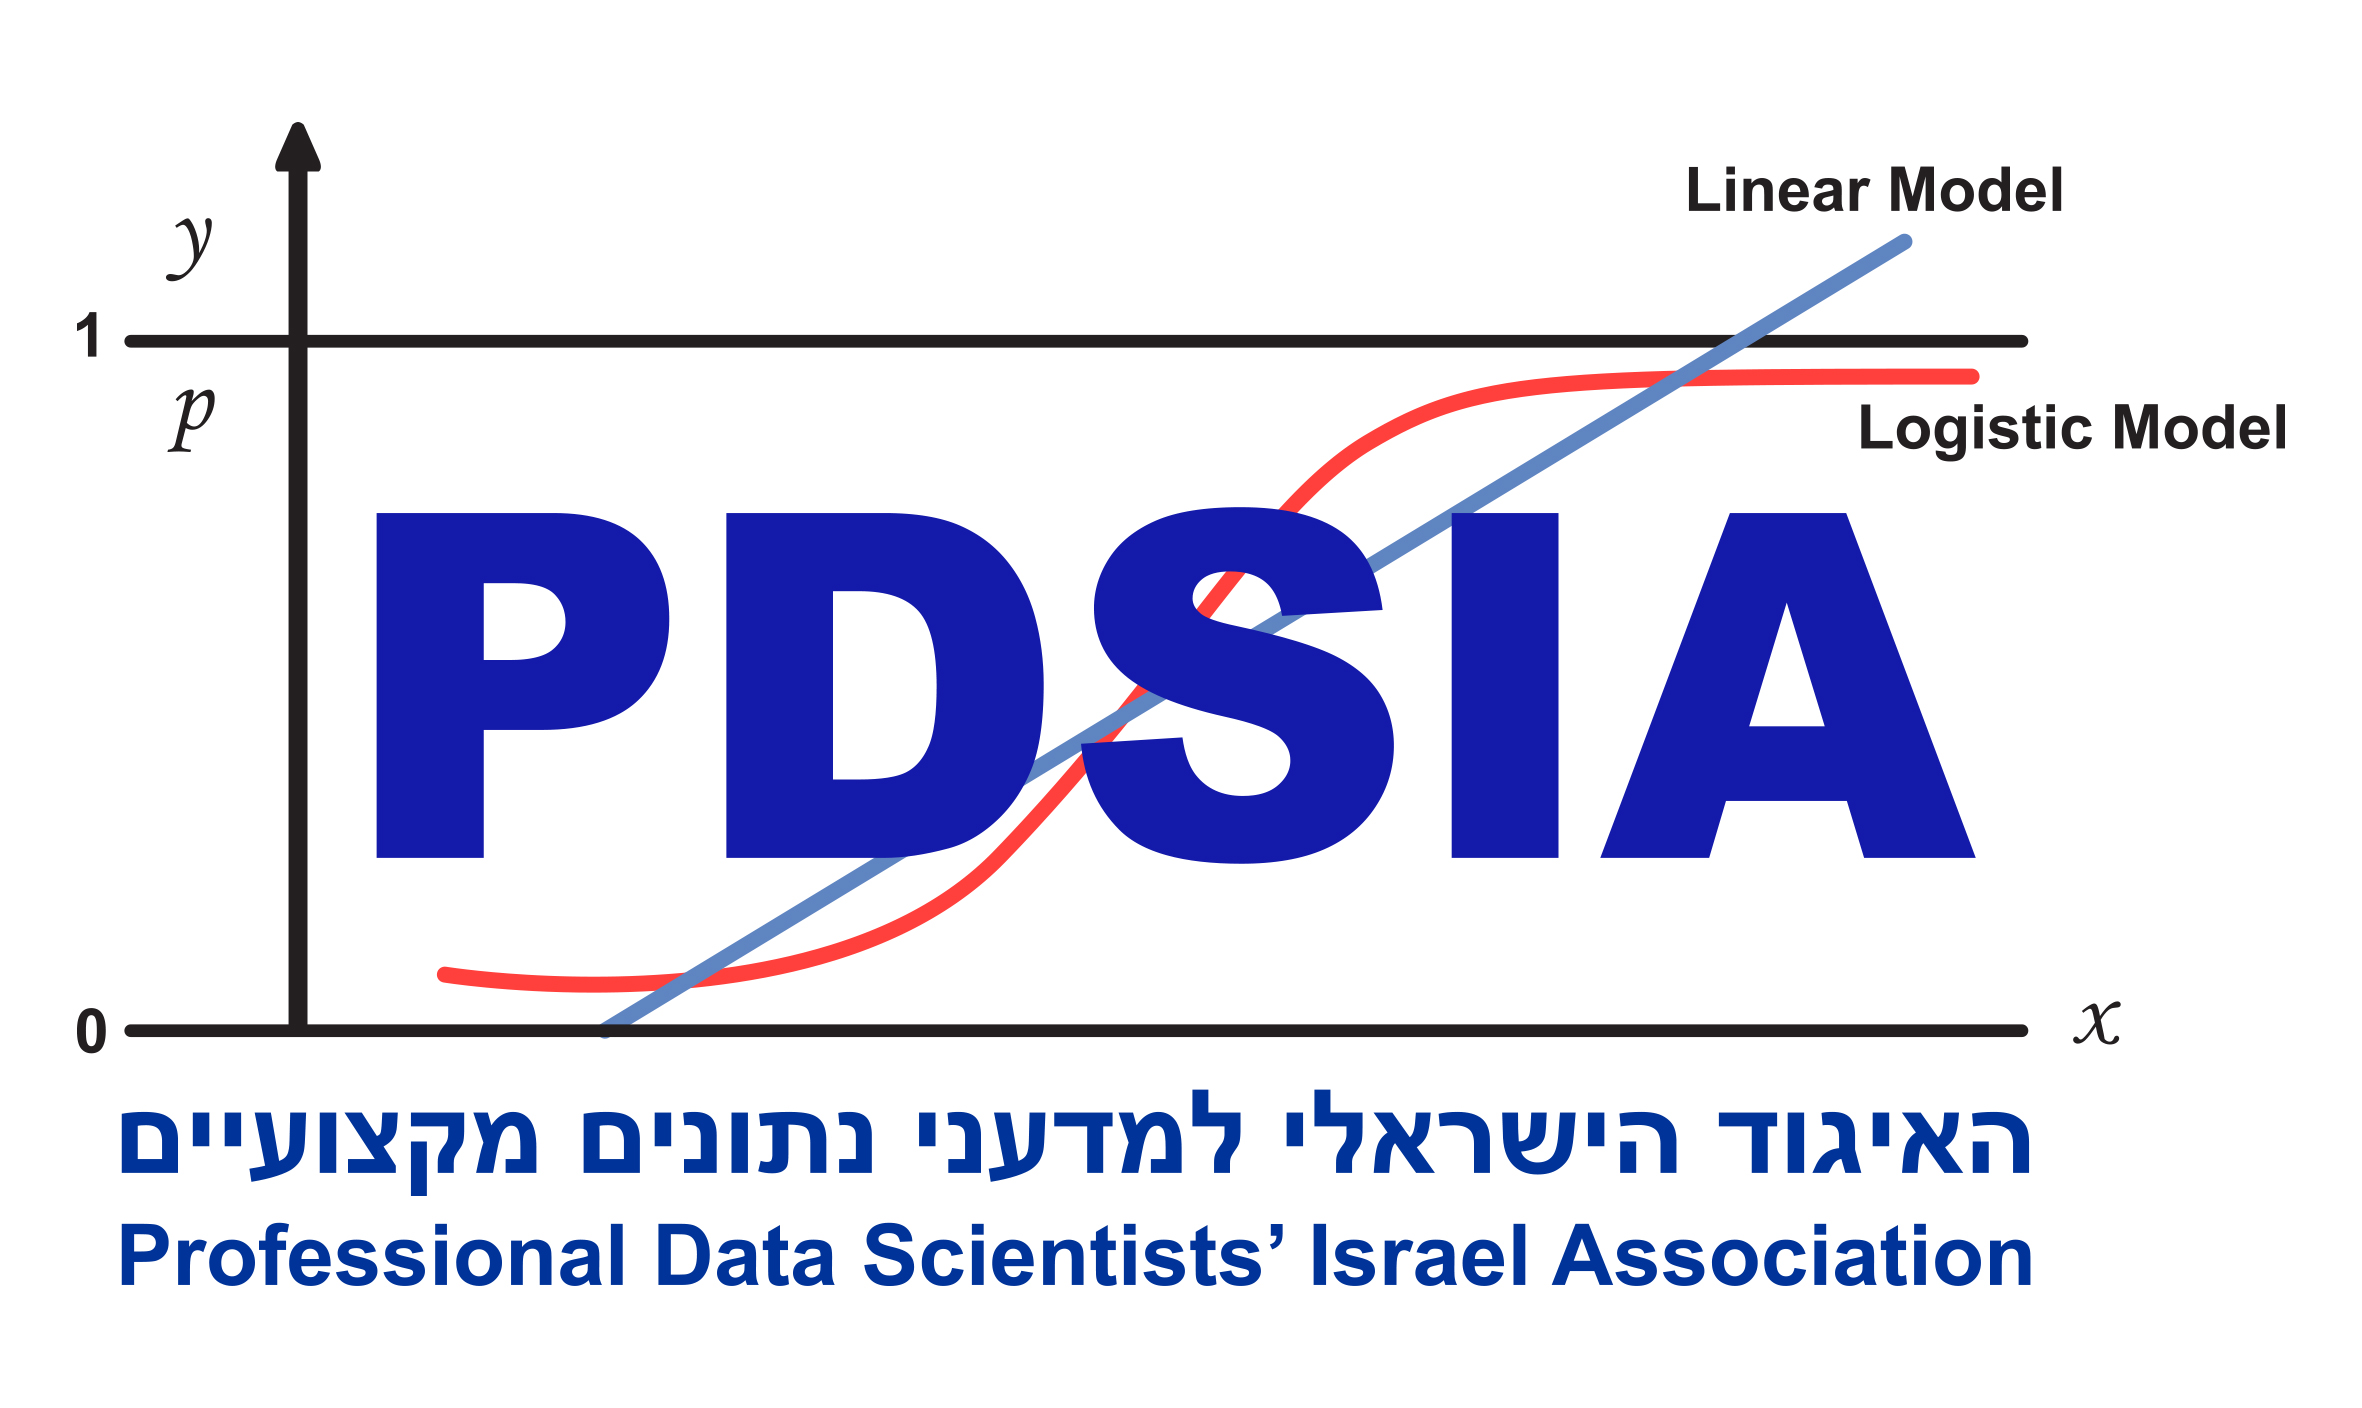

In [2]:
Image(filename='logo.jpg')

# Problem

In order to predict San Francisco house prices, I chose the housing price dataset that was sourced from Zillow. This dataset was based on the houses sold between January 2013 and December 2015. It has many characteristics of learning.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
from statsmodels import regression
import seaborn as sns
rcParams['figure.figsize']=10,8
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

#  Loading the data

In [4]:
import pandas as pd
sf = pd.read_csv('House_prices_dataset.csv')

In [5]:
sf.columns

Index(['address', 'info', 'z_address', 'bathrooms', 'bedrooms', 'finishedsqft',
       'lastsolddate', 'lastsoldprice', 'latitude', 'longitude',
       'neighborhood', 'totalrooms', 'usecode', 'yearbuilt', 'zestimate',
       'zindexvalue', 'zipcode', 'zpid'],
      dtype='object')

In [6]:
sf.head()

,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,Address: 1160 Mission Street #2007,San FranciscoSales price: 1300000Sales date: ...,1160 Mission St UNIT 2007,2,2,1043,02/17/2016,1300000,37.778705,-122.412635,South of Market,4,Condominium,2007,1167508,"975,700",94103,83152781
1,Address: 260 King Street #475,San FranciscoSales price: 750000Sales date: 0...,260 King St UNIT 475,1,1,903,02/17/2016,750000,37.777641,-122.393417,South of Market,2,Condominium,2004,823719,"975,700",94107,69819817
2,Address: 560 Missouri Street #B,San FranciscoSales price: 1495000Sales date: ...,560 Missouri St # B,4,3,1425,02/17/2016,1495000,37.759198,-122.396516,Potrero Hill,7,Condominium,2003,1708594,"1,277,600",94107,64972847
3,Address: 350 Missouri Street,San FranciscoSales price: 2700000Sales date: ...,350 Missouri St,3,3,2231,02/17/2016,2700000,37.761886,-122.396769,Potrero Hill,6,SingleFamily,1927,2411236,"1,277,600",94107,15149489
4,Address: 3658 Folsom Street,San FranciscoSales price: 1530000Sales date: ...,3658 Folsom St,3,3,1300,02/17/2016,1530000,37.740795,-122.413453,Bernal Heights,6,SingleFamily,1900,1918539,"1,248,000",94110,15161978


In [7]:
sf.tail()

,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
11325,Address: 149 Laidley Street,San FranciscoSales price: 1950000Sales date: ...,149 Laidley St,2,3,2100,02/03/2016,1950000,37.739623,-122.428899,Glen Park,5,SingleFamily,1900,1895813,"1,628,900",94131,15184023
11326,Address: 737 Tehama Street #1,San FranciscoSales price: 1030000Sales date: ...,737 Tehama St # 1,2,2,977,02/02/2016,1030000,37.775184,-122.411567,South of Market,4,MultiFamily2To4,2006,999443,"957,300",94103,79845585
11327,Address: 319 De Long Street,San FranciscoSales price: 565000Sales date: 0...,319 De Long St,1,2,875,02/02/2016,565000,37.709411,-122.465031,Outer Mission,3,SingleFamily,1950,639167,"804,400",94112,15196286
11328,Address: 1655 48th Avenue,San FranciscoSales price: 762000Sales date: 0...,1655 48th Ave,1,2,697,02/02/2016,762000,37.755586,-122.508063,Outer Sunset,3,SingleFamily,1904,703197,"1,030,300",94122,15108054
11329,Address: 4219 Folsom Street,San FranciscoSales price: 950000Sales date: 0...,4219 Folsom St,2,3,1539,02/01/2016,950000,37.734334,-122.413534,Bernal Heights,5,SingleFamily,1976,962071,"1,214,400",94110,15164756


In [8]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 18 columns):
address          11330 non-null object
info             11330 non-null object
z_address        11330 non-null object
bathrooms        11330 non-null int64
bedrooms         11330 non-null int64
finishedsqft     11330 non-null int64
lastsolddate     11330 non-null object
lastsoldprice    11330 non-null int64
latitude         11330 non-null float64
longitude        11330 non-null float64
neighborhood     11330 non-null object
totalrooms       11330 non-null int64
usecode          11330 non-null object
yearbuilt        11330 non-null int64
zestimate        11330 non-null int64
zindexvalue      11330 non-null object
zipcode          11330 non-null int64
zpid             11330 non-null int64
dtypes: float64(2), int64(9), object(7)
memory usage: 1.6+ MB


In [9]:
sf.shape

(11330, 18)

# Basic statistics

In [10]:
sf.describe().T

,count,mean,std,min,25%,50%,75%,max
bathrooms,11330.0,1.913327e+00,1.015151e+00,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1.400000e+01
bedrooms,11330.0,2.614475e+00,1.299457e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+01
finishedsqft,11330.0,1.585421e+03,9.219782e+02,1.000000e+00,1.019000e+03,1.362000e+03,1.876000e+03,2.727500e+04
lastsoldprice,11330.0,1.263928e+06,1.042079e+06,5.350000e+02,7.292500e+05,9.900000e+05,1.450000e+06,2.388900e+07
latitude,11330.0,3.775971e+01,2.557802e-02,3.770817e+01,3.773929e+01,3.776051e+01,3.778139e+01,3.780608e+01
longitude,11330.0,-1.224365e+02,3.074340e-02,-1.225107e+02,-1.224552e+02,-1.224325e+02,-1.224134e+02,-1.223812e+02
totalrooms,11330.0,4.527802e+00,2.142380e+00,0.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,2.500000e+01
yearbuilt,11330.0,1.948498e+03,3.791120e+01,1.860000e+03,1.916000e+03,1.940000e+03,1.986000e+03,2.016000e+03
zestimate,11330.0,1.565695e+06,1.229417e+06,4.323850e+05,9.052375e+05,1.230758e+06,1.731170e+06,1.553325e+07
zipcode,11330.0,9.411691e+04,9.400877e+00,9.410200e+04,9.411000e+04,9.411500e+04,9.412300e+04,9.415800e+04


The count, mean, min and max rows are self-explanatory. The std shows the standard deviation, and the 25%, 50% and 75% rows show the corresponding percentiles.

# Data Cleaning

There are several features that we do not need, such as “info”, “z_address”, “zipcode”(We have “neighborhood” as a location variable), “zipid” and “zestimate”(This is the price estimated by Zillow, we don’t want our model to be affected by this), so, we will drop them.

In [11]:
sf.drop(["info"], axis=1, inplace=True)
sf.drop(["z_address"], axis=1, inplace=True)
sf.drop(["zipcode"], axis=1, inplace=True)
sf.drop(["zpid"], axis=1, inplace=True)
sf.drop(["zestimate"], axis=1, inplace=True)
sf.head()

,address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zindexvalue
0,Address: 1160 Mission Street #2007,2,2,1043,02/17/2016,1300000,37.778705,-122.412635,South of Market,4,Condominium,2007,"975,700"
1,Address: 260 King Street #475,1,1,903,02/17/2016,750000,37.777641,-122.393417,South of Market,2,Condominium,2004,"975,700"
2,Address: 560 Missouri Street #B,4,3,1425,02/17/2016,1495000,37.759198,-122.396516,Potrero Hill,7,Condominium,2003,"1,277,600"
3,Address: 350 Missouri Street,3,3,2231,02/17/2016,2700000,37.761886,-122.396769,Potrero Hill,6,SingleFamily,1927,"1,277,600"
4,Address: 3658 Folsom Street,3,3,1300,02/17/2016,1530000,37.740795,-122.413453,Bernal Heights,6,SingleFamily,1900,"1,248,000"


In [12]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 13 columns):
address          11330 non-null object
bathrooms        11330 non-null int64
bedrooms         11330 non-null int64
finishedsqft     11330 non-null int64
lastsolddate     11330 non-null object
lastsoldprice    11330 non-null int64
latitude         11330 non-null float64
longitude        11330 non-null float64
neighborhood     11330 non-null object
totalrooms       11330 non-null int64
usecode          11330 non-null object
yearbuilt        11330 non-null int64
zindexvalue      11330 non-null object
dtypes: float64(2), int64(6), object(5)
memory usage: 1.1+ MB


In [13]:
print(sf.address.unique())

['Address: 1160 Mission Street #2007' 'Address: 260 King Street #475'
 'Address: 560 Missouri Street #B' ... 'Address: 415 Victoria Street'
 'Address: 527 Woolsey Street' 'Address: 1 Crescent Way #1103']


In [14]:
sf.bathrooms.unique()

array([ 2,  1,  4,  3,  5,  7,  6, 14,  8,  0, 12,  9, 13], dtype=int64)

In [15]:
sf.bedrooms.unique()

array([ 2,  1,  3,  4,  5,  0,  7,  8,  6,  9, 12, 10, 16, 11, 20, 14, 13],
      dtype=int64)

In [16]:
sf.finishedsqft.unique()

array([1043,  903, 1425, ..., 1157, 2278, 3046], dtype=int64)

In [17]:
sf.lastsolddate.unique()

array(['02/17/2016', '08/12/2015', '02/16/2016', '02/12/2016',
       '02/11/2016', '02/10/2016', '02/09/2016', '02/08/2016',
       '02/05/2016', '02/04/2016', '06/11/2015', '02/03/2016',
       '02/02/2016', '02/01/2016', '01/29/2016', '01/28/2016',
       '01/27/2016', '03/24/2015', '01/26/2016', '01/25/2016',
       '01/22/2016', '01/21/2016', '01/20/2016', '01/19/2016',
       '01/15/2016', '01/14/2016', '01/13/2016', '01/12/2016',
       '01/11/2016', '01/08/2016', '01/07/2016', '01/06/2016',
       '11/25/2009', '01/05/2016', '01/04/2016', '12/31/2015',
       '12/30/2015', '01/03/2016', '12/29/2015', '12/28/2015',
       '12/24/2015', '12/23/2015', '12/22/2015', '12/21/2015',
       '12/18/2015', '12/17/2015', '07/16/2014', '12/20/2015',
       '12/16/2015', '12/15/2015', '12/17/2014', '12/14/2015',
       '12/11/2015', '12/10/2015', '12/09/2015', '12/08/2015',
       '12/07/2015', '12/04/2015', '12/03/2015', '12/02/2015',
       '12/01/2015', '11/30/2015', '11/25/2015', '11/24

In [18]:
sf.lastsolddate.min(), sf.lastsolddate.max()

('01/02/2013', '12/31/2015')

In [19]:
sf.lastsoldprice.unique()

array([1300000,  750000, 1495000, ..., 1290500, 1069000,  834000],
      dtype=int64)

In [20]:
sf.latitude.unique()

array([37.778705, 37.777641, 37.759198, ..., 37.755472, 37.718224,
       37.723853])

In [21]:
sf.longitude.unique()

array([-122.412635, -122.393417, -122.396516, ..., -122.467116,
       -122.465576, -122.407012])

In [22]:
sf.neighborhood.unique()

array(['South of Market', 'Potrero Hill', 'Bernal Heights',
       'Crocker Amazon', 'Oceanview', 'Mission Terrace', 'Noe Valley',
       'Hayes Valley', 'Portola',
       'Eureka Valley - Dolores Heights - Castro', 'Lake', 'Inner Sunset',
       'Sunnyside', 'Van Ness - Civic Center', 'Mission', 'Nob Hill',
       'Lower Pacific Heights', 'Central Richmond', 'Outer Sunset',
       'Bayview', 'Westwood Highlands', 'Forest Hill Extension',
       'Lakeshore', 'Corona Heights', 'Central Sunset', 'Pacific Heights',
       'West Portal', 'Lone Mountain', 'North Panhandle',
       'Diamond Heights', 'Downtown', 'Western Addition',
       'Presidio Heights', 'Midtown Terrace', 'Parnassus - Ashbury',
       'Silver Terrace', 'South Beach', 'Glen Park', 'Outer Mission',
       'Yerba Buena', 'Outer Parkside', 'Ingleside Heights',
       'Outer Richmond', 'Telegraph Hill', 'Visitacion Valley',
       'Buena Vista Park', 'Cow Hollow', 'Excelsior',
       'Mount Davidson Manor', 'Twin Peaks', 'Ha

In [23]:
sf.totalrooms.unique()

array([ 4,  2,  7,  6,  3,  5, 10,  1,  8, 12, 11,  9, 16, 14, 15, 21, 13,
        0, 23, 17, 18, 24, 20, 25], dtype=int64)

In [24]:
sf.usecode.unique()

array(['Condominium', 'SingleFamily', 'MultiFamily2To4', 'Miscellaneous',
       'Duplex', 'Townhouse', 'Mobile', 'Apartment', 'Cooperative',
       'MultiFamily5Plus'], dtype=object)

In [25]:
sf.yearbuilt.unique()

array([2007, 2004, 2003, 1927, 1900, 1924, 1939, 1912, 1890, 1953, 2008,
       1981, 1926, 1966, 1906, 2002, 2009, 1902, 2005, 1914, 1922, 1905,
       1931, 1940, 1937, 1950, 1936, 1943, 1904, 1911, 1932, 1982, 1925,
       1996, 2001, 1980, 1963, 2000, 1910, 1955, 1929, 1921, 1913, 1964,
       1949, 1908, 1941, 1918, 2006, 1976, 1997, 1885, 1962, 1999, 1916,
       1968, 1987, 1974, 1947, 1870, 2012, 1938, 1942, 1961, 1985, 1907,
       1989, 1928, 1984, 1923, 1944, 1970, 1930, 1879, 1977, 1995, 1978,
       1954, 1951, 1957, 1972, 1998, 1917, 1935, 1919, 1992, 1915, 1991,
       1965, 1946, 2013, 1986, 1920, 1979, 1958, 1994, 2014, 1960, 1945,
       1934, 2015, 1973, 1948, 1983, 1975, 1993, 2010, 1952, 1959, 1933,
       1990, 1988, 1909, 1872, 1956, 1967, 1969, 1901, 1876, 1903, 1878,
       1884, 1898, 1888, 1877, 1875, 1897, 1971, 1895, 1880, 1896, 2011,
       1891, 1894, 1886, 1893, 1892, 1899, 1889, 1882, 1866, 1883, 1887,
       1871, 1860, 2016, 1863], dtype=int64)

In [26]:
sf.zindexvalue.unique()

array(['975,700', '1,277,600', '1,248,000', '823,000', '762,700',
       '992,600', '1,782,000', '1,224,800', '888,400', '1,744,100',
       '2,244,500', '1,357,900', '1,038,200', '855,500', '1,185,400',
       '1,459,200', '1,178,700', '1,485,300', '1,031,800', '731,900',
       '1,424,100', '1,669,300', '1,264,800', '1,475,100', '1,125,700',
       '1,910,700', '1,565,000', '1,447,700', '1,231,800', '1,098,500',
       '807,800', '983,400', '5,333,500', '1,117,200', '2,151,400',
       '736,700', '1,286,900', '1,660,200', '814,200', '1,006,900',
       '981,900', '710,500', '1,214,000', '1,238,700', '707,100',
       '1,500,900', '2,151,200', '767,600', '1,378,600', '1,180,100',
       '1,369,500', '3,056,100', '2,186,800', '874,200', '1,630,000',
       '1,476,600', '4,464,800', '1,129,000', '1,215,700', '1,112,900',
       '1,685,300', '1,250,700', '757,700', '1,624,900', '1,235,600',
       '1,975,100', '1,318,200', '1,390,900', '1,884,400', '1,214,400',
       '2,111,800', '1,111

The data type of “zindexvalue” should be numeric, so let’s change that.

In [27]:
sf['zindexvalue'] = sf['zindexvalue'].str.replace(',', '')
sf['zindexvalue'] = pd.to_numeric(sf['zindexvalue'], errors='coerce')
sf.zindexvalue.unique()

array([ 975700, 1277600, 1248000,  823000,  762700,  992600, 1782000,
       1224800,  888400, 1744100, 2244500, 1357900, 1038200,  855500,
       1185400, 1459200, 1178700, 1485300, 1031800,  731900, 1424100,
       1669300, 1264800, 1475100, 1125700, 1910700, 1565000, 1447700,
       1231800, 1098500,  807800,  983400, 5333500, 1117200, 2151400,
        736700, 1286900, 1660200,  814200, 1006900,  981900,  710500,
       1214000, 1238700,  707100, 1500900, 2151200,  767600, 1378600,
       1180100, 1369500, 3056100, 2186800,  874200, 1630000, 1476600,
       4464800, 1129000, 1215700, 1112900, 1685300, 1250700,  757700,
       1624900, 1235600, 1975100, 1318200, 1390900, 1884400, 1214400,
       2111800, 1111300, 2134300,  719000, 1030800, 1628900, 1751900,
       1218900, 1269100, 1679000,  688100, 1608800,  957300, 1167700,
        986000,  982900, 5244900, 1070100,  891600, 1440700, 1449300,
        883100, 1264000, 1094000, 1202900, 1337700, 1480400, 1187700,
       1030300, 1215

# Exploratory data analysis

To get a feel for the type of data we are dealing with, we plot a histogram for each numeric variable.

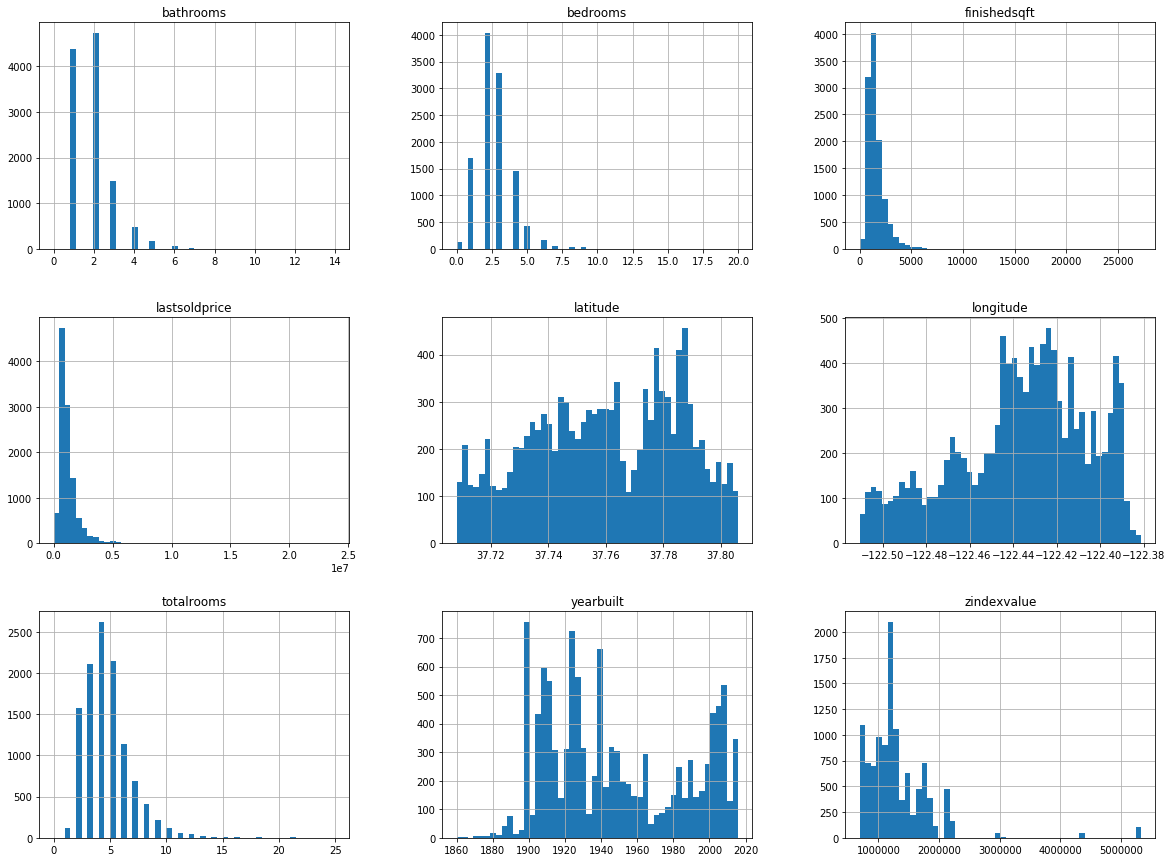

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
sf.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

Observations: 

1. These variables have very different scales. We will discuss this later in this chapter when we explore feature scaling.

2. Many histograms are right skewed: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.

Let’s create a scatter plot with latitude and longitude to visualize the data:

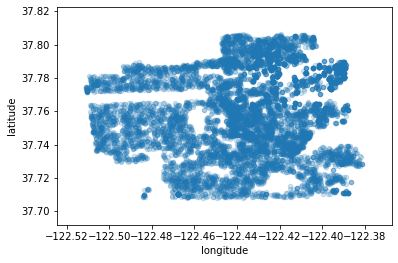

In [29]:
sf.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)
plt.savefig('map1.png')

Now let’s color code from the most expensive to the least expensive areas:

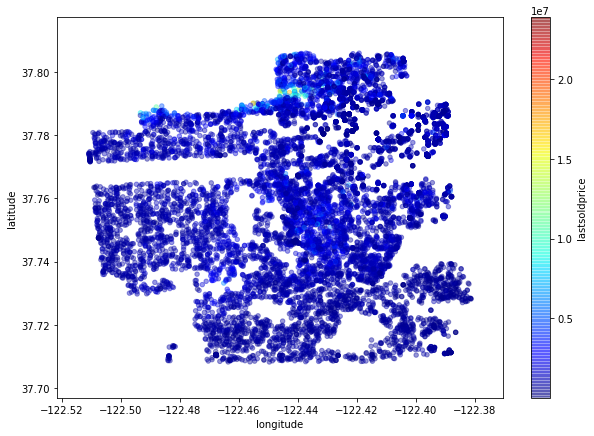

In [30]:
sf.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7),
    c="lastsoldprice", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.savefig('map2.png')

This image tells us that the most expensive houses sold were in the north area.

The variable we are going to predict is the “last sold price”. So let’s look at how much each independent variable correlates with this dependent variable.

In [31]:
corr_matrix = sf.corr()
corr_matrix["lastsoldprice"].sort_values(ascending=False)

lastsoldprice    1.000000
finishedsqft     0.647208
bathrooms        0.508307
totalrooms       0.480734
zindexvalue      0.460429
bedrooms         0.395478
latitude         0.283107
longitude       -0.052595
yearbuilt       -0.189055
Name: lastsoldprice, dtype: float64

The last sold price tends to go up when the finished sqft and number of bathrooms go up. You can see a small negative correlation between the year built and the last sold price. Finally, coefficients close to zero mean that there is no linear correlation.

We are now going to visualize the correlation between variables by using Pandas’ scatter_matrix function. We will just focus on a few promising variables, that seem the most correlated with the last sold price.

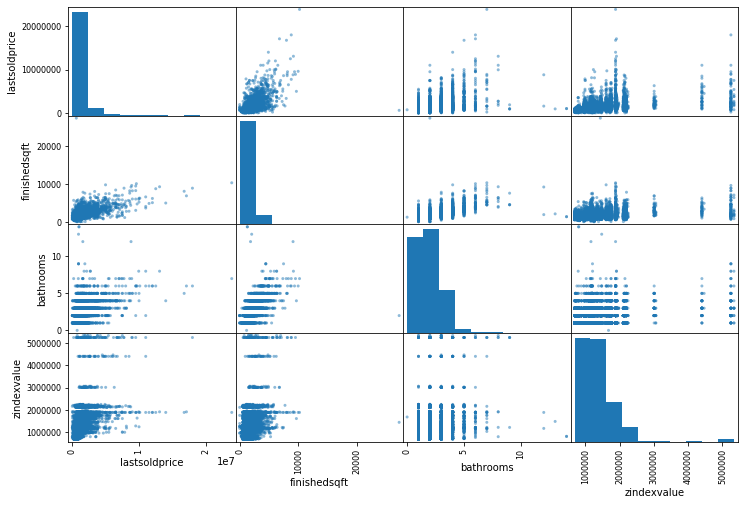

In [32]:
attributes = ["lastsoldprice", "finishedsqft", "bathrooms", "zindexvalue"]
scatter_matrix(sf[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

The most promising variable for predicting the last sold price is the finished sqft, so let’s zoom in on their correlation scatter plot.

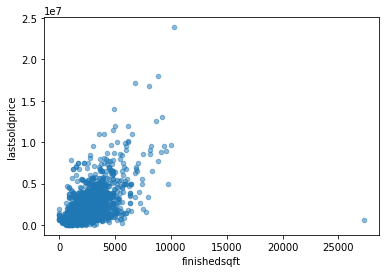

In [33]:
sf.plot(kind="scatter", x="finishedsqft", y="lastsoldprice", alpha=0.5)
plt.savefig('scatter.png')

The correlation is indeed very strong; you can clearly see the upward trend and that the points are not too dispersed.

# Feature Engineering

There are 71 neighborhoods in the data, and we are going to group them.

In [34]:
len(sf['neighborhood'].value_counts())

71

Because each house has different square footage and each neighborhood has different home prices, what we really need is the price per sqft. So, we add a new variable “price_per_sqft”.

In [35]:
sf['price_per_sqft'] = sf['lastsoldprice']/sf['finishedsqft']

The following steps cluster the neighborhood into three groups: 1. low price; 2. high price low frequency; 3. high price high frequency.

In [36]:
freq = sf.groupby('neighborhood').count()['address']
#mean_price: average price per sqft
mean = sf.groupby('neighborhood').mean()['price_per_sqft']
cluster = pd.concat([freq, mean], axis=1)
cluster['neighborhood'] = cluster.index

In [37]:
cluster.columns = ['freq', 'price_per_sqft','neighborhood']

In [38]:
cluster.describe()

,freq,price_per_sqft
count,71.000000,71.000000
mean,159.577465,1664.908308
std,126.572696,3619.277749
min,3.000000,374.201197
25%,67.500000,613.337664
50%,123.000000,756.246284
75%,210.500000,985.156646
max,540.000000,26914.471572


These are the low price neighborhoods:

In [39]:
cluster1 = cluster[cluster.price_per_sqft < 756]
cluster1.index

Index(['Bayview', 'Central Richmond', 'Central Sunset', 'Crocker Amazon',
       'Daly City', 'Diamond Heights', 'Excelsior', 'Forest Hill',
       'Forest Hill Extension', 'Golden Gate Heights', 'Ingleside',
       'Ingleside Heights', 'Ingleside Terrace', 'Inner Parkside',
       'Inner Richmond', 'Inner Sunset', 'Lakeshore', 'Little Hollywood',
       'Merced Heights', 'Mission Terrace', 'Mount Davidson Manor',
       'Oceanview', 'Outer Mission', 'Outer Parkside', 'Outer Richmond',
       'Outer Sunset', 'Parkside', 'Portola', 'Silver Terrace', 'Sunnyside',
       'Visitacion Valley', 'West Portal', 'Western Addition',
       'Westwood Highlands', 'Westwood Park'],
      dtype='object', name='neighborhood')

These are the high price and low frequency neighborhoods:

In [40]:
cluster_temp = cluster[cluster.price_per_sqft >= 756]
cluster2 = cluster_temp[cluster_temp.freq <123]
cluster2.index

Index(['Buena Vista Park', 'Central Waterfront - Dogpatch', 'Corona Heights',
       'Haight-Ashbury', 'Lakeside', 'Lone Mountain', 'Midtown Terrace',
       'North Beach', 'North Waterfront', 'Parnassus - Ashbury',
       'Presidio Heights', 'Sea Cliff', 'St. Francis Wood', 'Telegraph Hill',
       'Twin Peaks'],
      dtype='object', name='neighborhood')

These are the high price and high frequency neighborhoods:

In [41]:
cluster3 = cluster_temp[cluster_temp.freq >=123]
cluster3.index

Index(['Bernal Heights', 'Cow Hollow', 'Downtown',
       'Eureka Valley - Dolores Heights - Castro', 'Glen Park', 'Hayes Valley',
       'Lake', 'Lower Pacific Heights', 'Marina', 'Miraloma Park', 'Mission',
       'Nob Hill', 'Noe Valley', 'North Panhandle', 'Pacific Heights',
       'Potrero Hill', 'Russian Hill', 'South Beach', 'South of Market',
       'Van Ness - Civic Center', 'Yerba Buena'],
      dtype='object', name='neighborhood')

Add neighborhoodg column based on the clusters

In [42]:
def get_group(x):
    if x in cluster1.index:
        return 'neighborhood_low_price'
    elif x in cluster2.index:
        return 'neighborhood_high_price_low_freq'
    else:
        return 'neighborhood_high_price_high_freq'
sf['neighborhoodg'] = sf.neighborhood.apply(get_group)

In [43]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 15 columns):
address           11330 non-null object
bathrooms         11330 non-null int64
bedrooms          11330 non-null int64
finishedsqft      11330 non-null int64
lastsolddate      11330 non-null object
lastsoldprice     11330 non-null int64
latitude          11330 non-null float64
longitude         11330 non-null float64
neighborhood      11330 non-null object
totalrooms        11330 non-null int64
usecode           11330 non-null object
yearbuilt         11330 non-null int64
zindexvalue       11330 non-null int64
price_per_sqft    11330 non-null float64
neighborhoodg     11330 non-null object
dtypes: float64(3), int64(7), object(5)
memory usage: 1.3+ MB


In [44]:
sf.drop(["address"], axis=1, inplace=True)
sf.drop(["lastsolddate"], axis=1, inplace=True)
sf.drop(["neighborhood"], axis=1, inplace=True)
sf.drop(["price_per_sqft"], axis=1, inplace=True)

In [45]:
sf.describe().T

,count,mean,std,min,25%,50%,75%,max
bathrooms,11330.0,1.913327e+00,1.015151e+00,0.000000,1.000000,2.000000e+00,2.000000e+00,1.400000e+01
bedrooms,11330.0,2.614475e+00,1.299457e+00,0.000000,2.000000,2.000000e+00,3.000000e+00,2.000000e+01
finishedsqft,11330.0,1.585421e+03,9.219782e+02,1.000000,1019.000000,1.362000e+03,1.876000e+03,2.727500e+04
lastsoldprice,11330.0,1.263928e+06,1.042079e+06,535.000000,729250.000000,9.900000e+05,1.450000e+06,2.388900e+07
latitude,11330.0,3.775971e+01,2.557802e-02,37.708170,37.739286,3.776051e+01,3.778139e+01,3.780608e+01
longitude,11330.0,-1.224365e+02,3.074340e-02,-122.510726,-122.455157,-1.224325e+02,-1.224134e+02,-1.223812e+02
totalrooms,11330.0,4.527802e+00,2.142380e+00,0.000000,3.000000,4.000000e+00,5.000000e+00,2.500000e+01
yearbuilt,11330.0,1.948498e+03,3.791120e+01,1860.000000,1916.000000,1.940000e+03,1.986000e+03,2.016000e+03
zindexvalue,11330.0,1.320205e+06,5.848170e+05,688100.000000,982900.000000,1.211900e+06,1.480400e+06,5.333500e+06


Our data looks perfect!

# Creating dummy variables

But before we build the model, we need to create dummy variables for these two categorical variables: “usecode” and “neighborhoodg”.

In [46]:
sf.columns

Index(['bathrooms', 'bedrooms', 'finishedsqft', 'lastsoldprice', 'latitude',
       'longitude', 'totalrooms', 'usecode', 'yearbuilt', 'zindexvalue',
       'neighborhoodg'],
      dtype='object')

In [47]:
cat_vars=['usecode', 'neighborhoodg']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(sf[var], prefix=var)
    sf1=sf.join(cat_list)
    sf=sf1
cat_vars=['usecode', 'neighborhoodg']
sf_vars=sf.columns.values.tolist()
to_keep=[i for i in sf_vars if i not in cat_vars]

Our final data columns will be:

In [48]:
sf_final=sf[to_keep]
sf_final.columns.values

array(['bathrooms', 'bedrooms', 'finishedsqft', 'lastsoldprice',
       'latitude', 'longitude', 'totalrooms', 'yearbuilt', 'zindexvalue',
       'usecode_Apartment', 'usecode_Condominium', 'usecode_Cooperative',
       'usecode_Duplex', 'usecode_Miscellaneous', 'usecode_Mobile',
       'usecode_MultiFamily2To4', 'usecode_MultiFamily5Plus',
       'usecode_SingleFamily', 'usecode_Townhouse',
       'neighborhoodg_neighborhood_high_price_high_freq',
       'neighborhoodg_neighborhood_high_price_low_freq',
       'neighborhoodg_neighborhood_low_price'], dtype=object)

In [49]:
sf_final.drop(['neighborhoodg_neighborhood_low_price'], axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [50]:
X = sf_final.loc[:, sf_final.columns != 'lastsoldprice']
y = sf_final.loc[:, sf_final.columns == 'lastsoldprice']
y=y.astype('int') 

In [51]:
X.head()

,bathrooms,bedrooms,finishedsqft,latitude,longitude,totalrooms,yearbuilt,zindexvalue,usecode_Apartment,usecode_Condominium,usecode_Cooperative,usecode_Duplex,usecode_Miscellaneous,usecode_Mobile,usecode_MultiFamily2To4,usecode_MultiFamily5Plus,usecode_SingleFamily,usecode_Townhouse,neighborhoodg_neighborhood_high_price_high_freq,neighborhoodg_neighborhood_high_price_low_freq
0,2,2,1043,37.778705,-122.412635,4,2007,975700,0,1,0,0,0,0,0,0,0,0,1,0
1,1,1,903,37.777641,-122.393417,2,2004,975700,0,1,0,0,0,0,0,0,0,0,1,0
2,4,3,1425,37.759198,-122.396516,7,2003,1277600,0,1,0,0,0,0,0,0,0,0,1,0
3,3,3,2231,37.761886,-122.396769,6,1927,1277600,0,0,0,0,0,0,0,0,1,0,1,0
4,3,3,1300,37.740795,-122.413453,6,1900,1248000,0,0,0,0,0,0,0,0,1,0,1,0


In [52]:
y.shape

(11330, 1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns1= X_train.columns

In [54]:
os_data_X, os_data_y = X_train, y_train

In [55]:
os_data_X = pd.DataFrame(data=os_data_X,columns=columns1)
os_data_y= pd.DataFrame(data=os_data_y,columns=['lastsoldprice'])

# Recursive Feature Elimination

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [56]:
sf_final_vars=sf_final.columns.values.tolist()
y=['lastsoldprice']
X=[i for i in sf_final_vars if i not in y]
lr=LinearRegression()
rfe = RFE(lr, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [57]:
sf_X2 = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rfe.ranking_},)
sf_X2.sort_values(by=['Importance'])

,Feature,Importance
0,bathrooms,1
17,usecode_Townhouse,1
16,usecode_SingleFamily,1
15,usecode_MultiFamily5Plus,1
14,usecode_MultiFamily2To4,1
13,usecode_Mobile,1
12,usecode_Miscellaneous,1
11,usecode_Duplex,1
10,usecode_Cooperative,1
9,usecode_Condominium,1


In [58]:
cols=[]
for i in range (0, len(sf_X2["Importance"])):
    if sf_X2["Importance"][i] == 1:
        cols.append(sf_X2["Feature"][i])
print(cols)
print(len(cols))

['bathrooms', 'bedrooms', 'finishedsqft', 'latitude', 'longitude', 'totalrooms', 'yearbuilt', 'zindexvalue', 'usecode_Apartment', 'usecode_Condominium', 'usecode_Cooperative', 'usecode_Duplex', 'usecode_Miscellaneous', 'usecode_Mobile', 'usecode_MultiFamily2To4', 'usecode_MultiFamily5Plus', 'usecode_SingleFamily', 'usecode_Townhouse', 'neighborhoodg_neighborhood_high_price_high_freq', 'neighborhoodg_neighborhood_high_price_low_freq']
20


The RFE has helped us select the following features: ['bathrooms', 'bedrooms', 'finishedsqft', 'latitude', 'longitude', 'totalrooms', 'yearbuilt', 'zindexvalue', 'usecode_Apartment', 'usecode_Condominium', 'usecode_Cooperative', 'usecode_Duplex', 'usecode_Miscellaneous', 'usecode_Mobile', 'usecode_MultiFamily2To4', 'usecode_MultiFamily5Plus', 'usecode_SingleFamily', 'usecode_Townhouse', 'neighborhoodg_neighborhood_high_price_high_freq', 'neighborhoodg_neighborhood_high_price_low_freq']

In [59]:
X=os_data_X[cols]
y=os_data_y['lastsoldprice']

# Implementing the model

In [60]:
# Add a constant to the independent value
X1 = sm.add_constant(X)

# make regression model 
model = sm.OLS(y, X1)

# fit model and print results
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          lastsoldprice   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     569.7
Date:                Sat, 09 May 2020   Prob (F-statistic):               0.00
Time:                        01:55:01   Log-Likelihood:            -1.1818e+05
No. Observations:                7931   AIC:                         2.364e+05
Df Residuals:                    7912   BIC:                         2.365e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [61]:
pvalue = pd.DataFrame(result.pvalues,columns={'p_value'},)
pvalue

,p_value
const,6.099611e-03
bathrooms,1.626073e-34
bedrooms,1.797001e-20
finishedsqft,0.000000e+00
latitude,7.719554e-65
longitude,3.660572e-05
totalrooms,8.307467e-24
yearbuilt,3.621000e-01
zindexvalue,7.264997e-53
usecode_Apartment,7.021781e-03


In [62]:
pvs=[]
for i in range (0, len(pvalue["p_value"])):
    if pvalue["p_value"][i] < 0.05:
        pvs.append(pvalue.index[i])
print(pvs)
print(len(pvs))
if 'const' in pvs:
    pvs.remove('const')

['const', 'bathrooms', 'bedrooms', 'finishedsqft', 'latitude', 'longitude', 'totalrooms', 'zindexvalue', 'usecode_Apartment', 'usecode_Condominium', 'usecode_Cooperative', 'usecode_Duplex', 'usecode_Miscellaneous', 'usecode_Mobile', 'usecode_MultiFamily2To4', 'usecode_MultiFamily5Plus', 'usecode_SingleFamily', 'usecode_Townhouse', 'neighborhoodg_neighborhood_high_price_high_freq', 'neighborhoodg_neighborhood_high_price_low_freq']
20


In [63]:
X=os_data_X[pvs]
y=os_data_y['lastsoldprice']
X1 = sm.add_constant(X)
model = sm.OLS(y, X1)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          lastsoldprice   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     603.1
Date:                Sat, 09 May 2020   Prob (F-statistic):               0.00
Time:                        01:55:01   Log-Likelihood:            -1.1818e+05
No. Observations:                7931   AIC:                         2.364e+05
Df Residuals:                    7913   BIC:                         2.365e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [64]:
if 'const' in pvs:
    pvs.remove('const')
X=os_data_X[pvs]
y=os_data_y['lastsoldprice']

#  Co-relation between variables

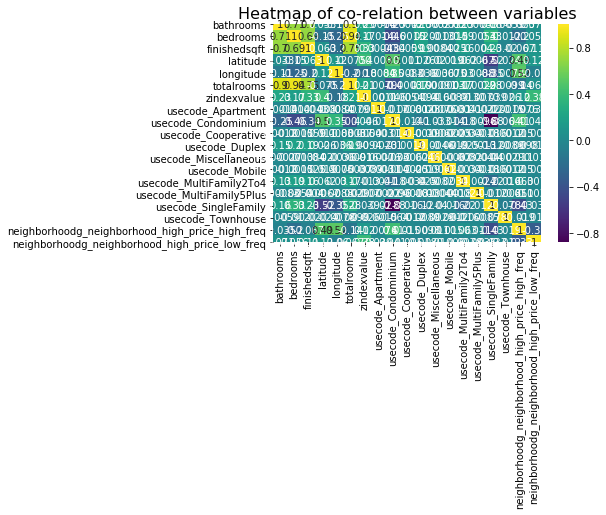

In [65]:
#Use heatmap to see corelation between variables
sns.heatmap(X.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

# Baseline Linear Regression

In [66]:
# Normalize Feature variable
# initiatilise
ss=StandardScaler()
#apply stardardisation
X_std=ss.fit_transform(X)  

In [67]:
#split the data into train and test with test size and 30% and train size as 70%
X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.3, random_state=42)
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

Training data size: (5551, 19)
Test data size: (2380, 19)


## Train the model

In [69]:
lr=LinearRegression()
#fit the linear model on train data
lr_model=lr.fit(X_train,y_train)  

Done! We now have a working Linear Regression model.

# Prediction

In [70]:
#predict using the model
y_pred=lr_model.predict(X_test)  
#calculate R squared
print("R squared of baseline linear regression model:", "{:.2%}".format(lr_model.score(X_test, y_test)))
 #calculate rmse
rmse=np.sqrt(mean_squared_error(y_test,y_pred))     
print('RMSE of baseline linear regression model:',rmse)

R squared of baseline linear regression model: 60.42%
RMSE of baseline linear regression model: 655858.169840434


So, in our model, 60.42% of the variability in Y can be explained using X. It is not so exciting.

# Decision Tree Regression

Let us try to apply Decision Tree Regression technique and see if any improvement happens

## Train the model

In [71]:
dt_one_reg=DecisionTreeRegressor()
#fit the Decision Tree Regression on train data
dt_model=dt_one_reg.fit(X_train,y_train)

## Prediction

In [72]:
#predict using the model
y_pred_dtone=dt_one_reg.predict(X_test)
#calculate R squared
print("R squared of Decision Tree Regression model:", "{:.2%}".format(dt_model.score(X_test, y_test)))
 #calculate rmse
rmse=np.sqrt(mean_squared_error(y_pred_dtone,y_test))    
print('RMSE of Decision Tree Regression model:',rmse)

R squared of Decision Tree Regression model: 56.83%
RMSE of Decision Tree Regression model: 684998.9766558816


# Random Forest Regression

Let us apply Random Forest Regression and measure RMSE

## Train the model

In [73]:
rf_reg=RandomForestRegressor()
#fit the Random Forest Regression on train data
rf_model=rf_reg.fit(X_train,y_train)

## Prediction

In [74]:
#predict using the model
y_pred_rf=rf_reg.predict(X_test)
#calculate R squared
print("R squared of Random Forest Regression model:", "{:.2%}".format(rf_model.score(X_test, y_test)))
 #calculate rmse
rmse=np.sqrt(mean_squared_error(y_pred_rf,y_test))    
print('RMSE of Random Forest Regression model:',rmse)

R squared of Random Forest Regression model: 74.59%
RMSE of Random Forest Regression model: 525570.0997589862


# Gradient Boosting Regression

Let us apply Gradient Boosting Regression and measure RMSE

# Train the model

In [75]:
gb_reg = GradientBoostingRegressor()
#fit the Gradient Boosting Regression on train data
gb_model=gb_reg.fit(X_train,y_train)

# Prediction

In [76]:
#predict using the model
y_pred_gb=gb_reg.predict(X_test)
#calculate R squared
print("R squared of Gradient Boosting Regression model:", "{:.2%}".format(gb_model.score(X_test, y_test)))
 #calculate rmse
rmse=np.sqrt(mean_squared_error(y_pred_gb,y_test))    
print('RMSE of Gradient Boosting Regression model:',rmse)

R squared of Gradient Boosting Regression model: 72.19%
RMSE of Gradient Boosting Regression model: 549762.3508064522


# Support Vector Machine Regression

Let us apply Support Vector Machine Regression and measure RMSE

## Train the model

In [77]:
sv_reg=SVR()
#fit the Support Vector Machine Regression on train data
sv_model=sv_reg.fit(X_train,y_train)

## Prediction

In [78]:
#predict using the model
y_pred_sv=sv_reg.predict(X_test)
#calculate R squared
print("R squared of Support Vector Machine Regression model:", "{:.2%}".format(sv_model.score(X_test, y_test)))
 #calculate rmse
rmse=np.sqrt(mean_squared_error(y_pred_sv,y_test))    
print('RMSE of Support Vector Machine Regression model:',rmse)

R squared of Support Vector Machine Regression model: -7.27%
RMSE of Support Vector Machine Regression model: 1079757.9519540262


# Final Conclusion

In [79]:
print('RMSE of Linear Regression model:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('RMSE of Decision Tree Regression model:',np.sqrt(mean_squared_error(y_pred_dtone,y_test)))
print('RMSE of Random Forest Regression model:',np.sqrt(mean_squared_error(y_pred_rf,y_test)))
print('RMSE of Gradient Boosting Regression model:',np.sqrt(mean_squared_error(y_pred_gb,y_test)))
print('RMSE of Support Vector Regression model:',np.sqrt(mean_squared_error(y_pred_sv,y_test)))

RMSE of Linear Regression model: 655858.169840434
RMSE of Decision Tree Regression model: 684998.9766558816
RMSE of Random Forest Regression model: 525570.0997589862
RMSE of Gradient Boosting Regression model: 549762.3508064522
RMSE of Support Vector Regression model: 1079757.9519540262


__Hence Random Forest algorithm is selected for the prediction of lastsoldprice using the features__

# Real Time Prediction

In [80]:
chosenModel = X.columns
chosenModel

Index(['bathrooms', 'bedrooms', 'finishedsqft', 'latitude', 'longitude',
       'totalrooms', 'zindexvalue', 'usecode_Apartment', 'usecode_Condominium',
       'usecode_Cooperative', 'usecode_Duplex', 'usecode_Miscellaneous',
       'usecode_Mobile', 'usecode_MultiFamily2To4', 'usecode_MultiFamily5Plus',
       'usecode_SingleFamily', 'usecode_Townhouse',
       'neighborhoodg_neighborhood_high_price_high_freq',
       'neighborhoodg_neighborhood_high_price_low_freq'],
      dtype='object')

In [81]:
len(chosenModel)

19

In [82]:
a = int(input("Please enter the number of bathrooms in the house:"))
b = int(input("Please enter the number of bedrooms in the house:"))
c = int(input("Please enter the size of the house in square feet:"))
d = float(input("Please enter the latitude in which the house is located:"))
e = float(input("Please enter the longitude in which the house is located:"))
f = int(input("Please enter the total number of rooms in the house:"))
g = int(input("Please enter the Zillow home value index as estimated by Zillow:"))
h = int(input("Is the house type Apartment (1 if yes, 0 otherwise):"))
i = int(input("Is the house type Condominium (1 if yes, 0 otherwise):"))
j = int(input("Is the house type Cooperative (1 if yes, 0 otherwise):"))
k = int(input("Is the house type Duplex (1 if yes, 0 otherwise):"))
l = int(input("Is the house type Miscellaneous (1 if yes, 0 otherwise):"))
m = int(input("Is the house type Mobile (1 if yes, 0 otherwise):"))
n = int(input("Is the house type MultiFamily2To4 (1 if yes, 0 otherwise):"))
o = int(input("Is the house type MultiFamily5Plus (1 if yes, 0 otherwise):"))
p = int(input("Is the house type SingleFamily (1 if yes, 0 otherwise):"))
q = int(input("Is the house type Townhouse (1 if yes, 0 otherwise):"))
r = int(input("Is the house located in a high price high frequency neighborhood (1 if yes, 0 otherwise):"))
s = int(input("Is the house located in a high price low frequency neighborhood (1 if yes, 0 otherwise):"))
new_data = np.array([a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s]).reshape(1,-1)
new_pred=rf_reg.predict(new_data)
result = int(new_pred[0])
print("\033[1m The house price is predicted to be: $",result)

Please enter the number of bathrooms in the house:2
Please enter the number of bedrooms in the house:2
Please enter the size of the house in square feet:1043
Please enter the latitude in which the house is located:37.778705
Please enter the longitude in which the house is located:-122.412635
Please enter the total number of rooms in the house:4
Please enter the Zillow home value index as estimated by Zillow:975700
Is the house type Apartment (1 if yes, 0 otherwise):0
Is the house type Condominium (1 if yes, 0 otherwise):1
Is the house type Cooperative (1 if yes, 0 otherwise):0
Is the house type Duplex (1 if yes, 0 otherwise):0
Is the house type Miscellaneous (1 if yes, 0 otherwise):0
Is the house type Mobile (1 if yes, 0 otherwise):0
Is the house type MultiFamily2To4 (1 if yes, 0 otherwise):0
Is the house type MultiFamily5Plus (1 if yes, 0 otherwise):0
Is the house type SingleFamily (1 if yes, 0 otherwise):0
Is the house type Townhouse (1 if yes, 0 otherwise):0
Is the house located in 